In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E001d1_Full_DB_FDB_Added.csv')
df

c:\Users\olowe_m\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,5,7,8,9,10,18,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,48,49,100,107,109,123) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Pipe_Extract_Tag_text,Pipe_Extract_PType,Pipe_Extract_Measured_l,Pipe_Extract_Water_type,Pipe_Extract_Id_wqz_cod,Pipe_Extract_Id_dma_cod,Pipe_Extract_Id_control,Pipe_Extract_Id_pla_cod,Pipe_Extract_Latest_lin,Pipe_Extract_Factory_li,...,Pipe_supply_Charecteristics_Direct_SW_MinDist,Pipe_supply_Charecteristics_Direct_SG_MinDist,Pipe_supply_Charecteristics_Direct_GW_MinDist,Pipe_supply_Charecteristics_Indirect_Source_No,Pipe_supply_Charecteristics_Indirect_Source_Types,Pipe_supply_Charecteristics_Source_Summary,SAP_bursts_V2_FINAL_ASSET,SAP_bursts_V2_FDB_TECHNIQUE,SAP_bursts_V2_FWR_CREATE_DATE,Prediction_SAP_Burst
0,1398010929,D,444.451,PW,ZGL08,07354,CGSV26,7365.0,NaN,NaN,...,0.0,0.0,0.0,1,SW Only,Direct: None / Indirect: SW Only,1.398011e+09,LENGTH >2M,20150811.0,1
1,1398010889,D,169.875,PW,ZGL08,07354,CGSV26,7365.0,NaN,NaN,...,0.0,0.0,0.0,1,SW Only,Direct: None / Indirect: SW Only,1.398011e+09,UNDER PRESSURE,20120111.0,1
2,1601982100,D,223.589,PW,ZSP20,02731,CGSV03,1723.0,NaN,NaN,...,0.0,0.0,0.0,0,None,Direct: Import Only / Indirect: None,1.601982e+09,PIECE <=2M,20111014.0,1
3,1200507973,D,126.380,PW,ZSP07,18254,CGSV21,1174.0,NaN,NaN,...,0.0,0.0,0.0,1,GW Only,Direct: None / Indirect: GW Only,1.200508e+09,COLLAR,20130722.0,1
4,1200508304,D,261.290,PW,ZSP07,18254,CGSV21,1176.0,NaN,NaN,...,0.0,0.0,0.0,1,GW Only,Direct: None / Indirect: GW Only,1.200508e+09,PIECE <=2M,20120828.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251030,3000803133,T,16.519,RW,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0,None,Direct: None / Indirect: None,NaN,NaN,NaN,0
1251031,1400685897,T,653.173,RW,ZWA11,NaN,WSG,NaN,NaN,NaN,...,0.0,0.0,0.0,0,None,Direct: None / Indirect: None,NaN,NaN,NaN,0
1251032,3001180834,T,25.980,RW,ZWA11,NaN,WSG,NaN,NaN,NaN,...,0.0,0.0,0.0,0,None,Direct: None / Indirect: None,NaN,NaN,NaN,0
1251033,3001180919,T,10.708,RW,ZWA11,NaN,WSG,NaN,NaN,NaN,...,0.0,0.0,0.0,0,None,Direct: None / Indirect: None,NaN,NaN,NaN,0


In [4]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251035 entries, 0 to 1251034
Columns: 126 entries, Pipe_Extract_Tag_text to Prediction_SAP_Burst
dtypes: float64(61), int64(14), object(51)
memory usage: 1.2+ GB


understanding each column and relevance - qualitative excercise

Remove a column if we think it has no relevance to the potential model

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#count of null values
column_na_count = df.isna().sum(axis=0)

Make the below a function

In [8]:
#count of distinct values within column
dataset_nunique = df.nunique()
#unique and na count
result = pd.concat([dataset_nunique.to_frame(), column_na_count.to_frame()], axis = 1)
result.columns = ['nuinique', 'Na_count']
result['filled_count'] = len(df) - result['Na_count']
result['empty_fraction'] = result['Na_count'] / len(df)
result['empty_fraction'] = result['empty_fraction'].apply(lambda x: round(x, 3))
result

,nuinique,Na_count,filled_count,empty_fraction
Pipe_Extract_Tag_text,1241801,0,1251035,0.000
Pipe_Extract_PType,2,0,1251035,0.000
Pipe_Extract_Measured_l,165602,0,1251035,0.000
Pipe_Extract_Water_type,3,0,1251035,0.000
Pipe_Extract_Id_wqz_cod,222,8217,1242818,0.007
Pipe_Extract_Id_dma_cod,6916,41660,1209375,0.033
Pipe_Extract_Id_control,148,9334,1241701,0.007
Pipe_Extract_Id_pla_cod,5793,176361,1074674,0.141
Pipe_Extract_Latest_lin,13,1004237,246798,0.803
Pipe_Extract_Factory_li,12,1181530,69505,0.944


In [9]:
import os
result.to_csv('Dataset_overview.csv')

In [10]:
df.shape

(1251035, 126)

In [11]:
#count of duplicated row
drop_values = df.drop_duplicates()

In [12]:
drop_values.shape

(1251035, 126)

In [13]:
# Duplicate columns

# This function take a dataframe
# as a parameter and returning list
# of column names whose contents
# are duplicates.
def getDuplicateColumns(df):

	# Create an empty set
	duplicateColumnNames = set() #store multiple items in a single variable
	
	# Iterate through all the columns
	# of dataframe
	for x in range(df.shape[1]): #give number of col count ref:- https://www.codegrepper.com/code-examples/python/df.shape%5B1%5D
		
		# Take column at xth index.
		col = df.iloc[:, x]
		
		# Iterate through all the columns in
		# DataFrame from (x + 1)th index to
		# last index
		for y in range(x + 1, df.shape[1]):
			
			# Take column at yth index.
			otherCol = df.iloc[:, y]
			
			# Check if two columns at x & y
			# index are equal or not,
			# if equal then adding
			# to the set
			if col.equals(otherCol):
				duplicateColumnNames.add(df.columns.values[y])
			
	# Return list of unique column names
	# whose contents are duplicates.
	return list(duplicateColumnNames)

# Driver code
if __name__ == "__main__" : #not sure the meaning of this
    #https://www.freecodecamp.org/news/if-name-main-python-example/#:~:text=We%20can%20use%20an%20if,name%20if%20it%20is%20imported.

	# Get list of duplicate columns
	duplicateColNames = getDuplicateColumns(df)

	print('Duplicate Columns are :')
		
	# Iterate through duplicate
	# column names
	for column in duplicateColNames :
		print('Column Name : ', column)

Duplicate Columns are :
Column Name :  Leaps_modelled_pipe_pressure_Isolation
Column Name :  Pipe_supply_Charecteristics_Id_dma_cod
Column Name :  Asset_base_Length
Column Name :  Pipe_supply_Charecteristics_Id_pla_cod
Column Name :  Asset_base_DMA
Column Name :  Pipe_supply_Charecteristics_Id_control
Column Name :  Pipe_elevation_Isolation
Column Name :  Pipe_supply_Charecteristics_TrunkMain
Column Name :  Pipe_elevation_Measured_l
Column Name :  Pipe_Isolations_Isolation=Pipe_supply_Charecteristics_Isolation
Column Name :  Pipe_supply_Charecteristics_Measured_l
Column Name :  Pipe_supply_Charecteristics_PType


creat a new column which calulates by row how many total number of empty values

Creat a bar chart which could inform what the cut off point

In [14]:
df['Count_na'] = df.isnull().sum(axis=1)
df.head(10)

,Pipe_Extract_Tag_text,Pipe_Extract_PType,Pipe_Extract_Measured_l,Pipe_Extract_Water_type,Pipe_Extract_Id_wqz_cod,Pipe_Extract_Id_dma_cod,Pipe_Extract_Id_control,Pipe_Extract_Id_pla_cod,Pipe_Extract_Latest_lin,Pipe_Extract_Factory_li,Pipe_Extract_Previous_l,Pipe_Extract_Installed_,Pipe_Extract_Fjunctioni,Pipe_Extract_Tjunctioni,Pipe_Extract_XC,Pipe_Extract_YC,Pipe_Extract_Isolation,Pipe_Extract_TrunkMain,Pipe_Extract_Eff_Iso,Pipe_Extract_Diameter_mm,Asset_base_Model,Asset_base_Length,Asset_base_Environment,Asset_base_SPA,Asset_base_SAP_LOCA_1,Asset_base_WRZ_Name,Asset_base_Maint_Name,Asset_base_Original_Yearlad,Asset_base_Soil_Type_Des,Asset_base_SoilType_CG,Asset_base_SoilType,Asset_base_DMA,Asset_base_DMA_WQZ_Site,Asset_base_TP_Water_T,Asset_base_Owner,Asset_base_DT_Rehabil,Asset_base_ST_Operational,Asset_base_TP_Latest_T,Asset_base_Pop_Year,Asset_base_Subtype,Asset_base_Pop_Mat,Asset_base_Pop_Diam,Asset_base_Model_Yearlaid,Asset_base_Material_Category,Asset_base_Model_Diameter,Asset_base_Material_Processed,Asset_base_Age(2018),Pipe_Extract_Diameter_Processed,SAP_bursts_V2_LeaPS_Valid_Boolean,SAP_bursts_V2_LeaPS_Valid_Description,Pipe_flow_v2_Isolation,Pipe_flow_v2_Flow_Min,Pipe_flow_v2_Flow_Min_Time,Pipe_flow_v2_Flow_Max,Pipe_flow_v2_Flow_Max_Time,Pipe_flow_v2_Headloss_Max,Pipe_flow_v2_Headloss_Max_Time,Leaps_modelled_pipe_pressure_Isolation,Leaps_modelled_pipe_pressure_Pres_Min,Leaps_modelled_pipe_pressure_Pres_Min_Time,Leaps_modelled_pipe_pressure_Pres_Avg,Leaps_modelled_pipe_pressure_Pres_Max,Leaps_modelled_pipe_pressure_Pres_Max_Time,Pipe_OS_Intersections_Roads Tracks And Paths_processed_(%),Pipe_OS_Intersections_Land_processed_(%),Pipe_OS_Intersections_Water_processed_(%),Pipe_OS_Intersections_Rail_processed_(%),Pipe_OS_Intersections_Structures_processed_(%),Pipe_OS_Intersections_Buildings_processed_(%),Pipe_OS_Intersections_Roads Tracks And Paths; Structures_processed_(%),Pipe_OS_Intersections_Buildings; Water_processed_(%),Pipe_OS_Intersections_Rail; Structures_processed_(%),Pipe_OS_Intersections_Land; Rail_processed_(%),Pipe_OS_Intersections_Land; Roads Tracks And Paths_processed_(%),Pipe_OS_Intersections_Land; Structures_processed_(%),Pipe_OS_Intersections_Structures; Water_processed_(%),Pipe_OS_Intersections_Buildings; Roads Tracks And Paths_processed_(%),Pipe_OS_Intersections_Rail; Roads Tracks And Paths_processed_(%),Pipe_OS_Intersections_Land; Water_processed_(%),Pipe_OS_Intersections_Heritage And Antiquities_processed_(%),Pipe_elevation_ID,Pipe_elevation_Measured_l,Pipe_elevation_Isolation,Pipe_elevation_Mod_S_Node,Pipe_elevation_Mod_S_Elevation,Pipe_elevation_Mod_E_Node,Pipe_elevation_Mod_E_Elevation,Pipe_elevation_Mod_Slope_m,Pipe_elevation_Mod_Slope%,Pipe_elevation_DEM_Min_Elevation,Pipe_elevation_DEM_Max_Elevation,Pipe_elevation_DEM_Slope_m,Pipe_elevation_DEM_Slope%,Pipe_Isolations_Isolation=Pipe_supply_Charecteristics_Isolation,Pipe_Isolations_Isolation_No,Pipe_Isolations_Pipe_No,Pipe_Isolations_Tot_Len,Pipe_Isolations_Valve_No,Pipe_Isolations_Closed_Valve_No,Pipe_Isolations_CG,Pipe_Isolations_DMA,Pipe_Isolations_WQZ,Pipe_Isolations_CWDP_No,Pipe_Isolations_Circumference,Pipe_Isolations_Volume_m3,Pipe_supply_Charecteristics_PType,Pipe_supply_Charecteristics_Measured_l,Pipe_supply_Charecteristics_Id_dma_cod,Pipe_supply_Charecteristics_Id_control,Pipe_supply_Charecteristics_Id_pla_cod,Pipe_supply_Charecteristics_TrunkMain,Pipe_supply_Charecteristics_PLA_Classification,Pipe_supply_Charecteristics_Direct_DSRs,Pipe_supply_Charecteristics_Direct_Boosters,Pipe_supply_Charecteristics_Direct_Sources_No,Pipe_supply_Charecteristics_Direct_Source_Types,Pipe_supply_Charecteristics_Direct_SW_MinDist,Pipe_supply_Charecteristics_Direct_SG_MinDist,Pipe_supply_Charecteristics_Direct_GW_MinDist,Pipe_supply_Charecteristics_Indirect_Source_No,Pipe_supply_Charecteristics_Indirect_Source_Types,Pipe_supply_Charecteristics_Source_Summary,SAP_bursts_V2_FINAL_ASSET,SAP_bursts_V2_FDB_TECHNIQUE,SAP_bursts_V2_FWR_CREATE_DATE,Prediction

Text(0, 0.5, 'Count')

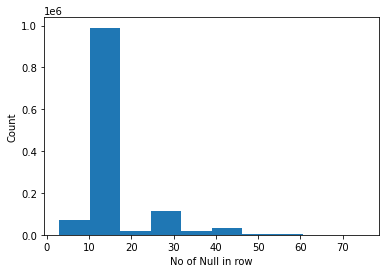

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['Count_na'])
plt.xlabel('No of Null in row')
plt.ylabel('Count')

Between 10-18, we observed the highed number of missing cells per row.
Between 25-32 and 39-46 there can also be observed missing cells per row.

within a row, how many missing data are there? What criteria/metric will be selected to remove a row?

Visualise missing values

In [18]:
import missingno as msno

<AxesSubplot:>

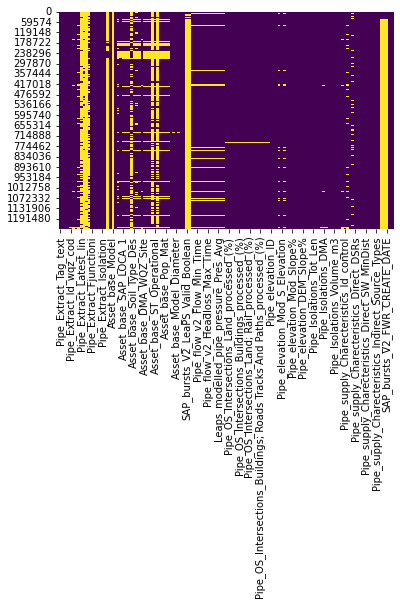

In [21]:
#
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

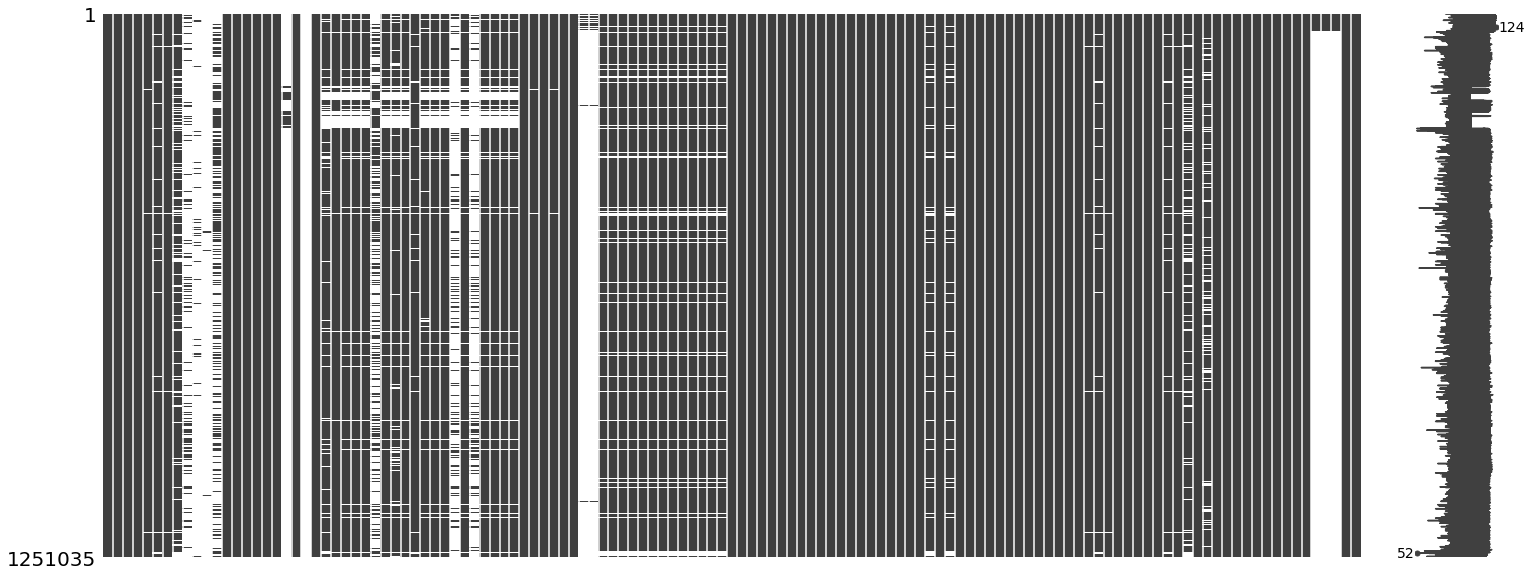

In [20]:
msno.matrix(df)

Feature engineering

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

Development of pipelines and Vectorizers

https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html

https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

https://stackoverflow.com/questions/63662308/how-to-create-a-scikit-pipeline-for-tf-idf-vectorizer

https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

In [ ]:
numeric_features = ['length',
 'fullstop_count',
 '//_count',
 'protocal_usage',
 'SD_count',
 '@_count',
 'underscore_count',
 'percent_count',
 'hash_count',
 'domain_hyphens',
 'slashes',
 'path_hyphens',
 'num_SD',
]

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['Pipe_Extract_PType', 'Pipe_Extract_Water_type']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Fit the pipeline
class Converter(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

#Perfom transformation
    def transform(self, data_frame):
        return data_frame.values.ravel()
    
vectorizer_features = ['','']
vectorizer_transformer = Pipeline(steps=[
    ('con', Converter()),
    ('tf', TfidfVectorizer())])

#Link all the transformers together in a ColumnTransformer, and create a pipeline for each classifier.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('domvec', vectorizer_transformer, ['domain_tokens']),
        ('pathvec', vectorizer_transformer, ['path_tokens'])
    ])

In [ ]:
# Defining regressand(Y) and regressors(X)
#X = df.drop('is_phishing', axis=1)
#y = df['is_phishing']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)